# Week 3 handin



## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


## 02 Status
Everything done.

## 03 Solution part 1

In [12]:
import random
import csv
import matplotlib.pyplot as plt

In [17]:
class Student():
    
    def __init__(self, name, gender, image_url, data_sheet):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url

#1.6
    def get_avg_grade(self):
        grades = self.data_sheet.grades_as_list()
        sum_of_grade = 0
        for grade in grades:
            sum_of_grade += int(grade)
        avg_grade = int(sum_of_grade)/len(grades)
        return avg_grade
    
#1.9
    def progression_in_percent(self):
        full_course = 150
        percentage = 0
        sum = 0
        for course in self.data_sheet.courses:
            sum += int(course.etcs)
        
        percentage = (sum/150)*100
        print(percentage)
        return percentage
    
    #def __str__(self):
    #   return "Studen Name: " + self.name + " and looks like " + self.image_url + "\n" + self.data_sheet.__str__()
    def __str__(self):
        return self.name + ","+ self.gender+ "," + self.image_url + self.data_sheet.__str__()
    
class DataSheet():
    
    def __init__(self, courses=[]):
        self.courses = courses

#1.5
    def grades_as_list(self):
        lst = []
        for x in self.courses:
            lst.append(x.grade)
        return lst
    
#     def __str__(self):
#         course_nr = 1
#         String = ""
#         for c in self.courses:
#             String += "Course " + str(course_nr) + ": " + c.name + " | " + c.teacher + " | " + c.etcs + " | " + str(c.classroom) + " | " + str(c.grade) +"\n"
#             course_nr += 1
#         return String
    def __str__(self):
        course_nr = 1
        String = ""
        for c in self.courses:
            String += "," + c.name + "," + c.teacher + "," + str(c.classroom) + "," + str(c.etcs) + "," + str(c.grade)
        return ","+str(len(self.courses)) + String +"\n"
    
class Course():
    
    def __init__(self, name, classroom, teacher, etcs, grade=-1):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.etcs = etcs
        self.grade = grade
    
#1.7
def generate_student(n, out="files/outputWeek3.csv"):
    StudentNameList = ["Andreas", "Alex", "Benjamin", "Nicolas", "Christoffer", "Lars", "Kim", "Henrik", "Victor", "Lenny", "Kasper", "Bo", "Hans"]
    TeatcherName = ["Lise", "kurt", "Arne", "Tess", "Nicolaj"]
    ClassRoom = [1,2,3,4,5,6,7,8,9]
    CourseName = ["Math", "Chemestry", "Gym", "Danglish", "English", "Computer Science", "physics"]
    Grades = [-3, 0, 2, 4, 7, 10, 12]
    Students = []
    
    i = 0
    with open(out, 'w') as o:
        while i < n:
            course1 = Course(random.choice(CourseName), random.choice(ClassRoom), random.choice(TeatcherName), random.randrange(10, 50, 10), random.choice(Grades))
            course2 = Course(random.choice(CourseName), random.choice(ClassRoom), random.choice(TeatcherName), random.randrange(10, 50, 10), random.choice(Grades))
            course3 = Course(random.choice(CourseName), random.choice(ClassRoom), random.choice(TeatcherName), random.randrange(10, 50, 10), random.choice(Grades))
            data = DataSheet([course1, course2, course3])
            newStudent = Student(random.choice(StudentNameList), "Male", "Image_url", data)
            Students.append(newStudent)
            i += 1
            o.write(newStudent.__str__())
    return Students

def retrive_students_from_csv(input):
    student_list = []
    with open(input, 'r') as o:
        reader = csv.reader(o)
        for row in reader:
            number_of_courses = int(row[3])
            courses_list = []
            number = 0
            x=0
            while x < number_of_courses:
                courses_list.append(Course(row[4+number], row[5+number], row[6+number], row[7+number], row[8+number]))
                number += 5
                x += 1
            student_list.append(Student(row[0], row[1], row[2], DataSheet(courses_list)))
    student_list.sort
    return student_list

def print_name_avg(list):
    for student in list:
        avg_grade = student.get_avg_grade()
        name = student.name
        img = student.image_url
        print("Navn:", name, " image:", img, " average grade:", avg_grade)
        
def sorted_by_avg_grade(list):
    for student in list:
        avg_grade = student.get_avg_grade()
        name = student.name
        img = student.image_url
        print("Navn:", name, " image:", img, " average grade:", avg_grade)
        
def sort_by_avg_grade(list):
    sorted_list = sorted(list, key=lambda obj: obj.get_avg_grade(), reverse=True)
    return sorted_list
 
    
    
    
    
# 1.8
def var_plot(list):
    name = []
    avg_grade = []
    for student in list:
        name.append(student.name)
        avg_grade.append(student.get_avg_grade())
    plt.bar(name, avg_grade, width=0.5, align='center')
    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
    plt.show()
    
#1.10
def etcs_plot(list):
    procent = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
    student_etcs= []
    for student in list:
        student_etcs.append(student.progression_in_percent())
        
#     zero_list[0]*10
#     for ects in student_etcs:
#         if ects == 0 or <= 10:
#             zero_list[0]+=1
#             elif <10 <= 20:
#                 zero
    
    plt.hist(student_etcs, density=False, bins=10)  # density=False would make counts
    plt.ylabel('Number of students')
    plt.xlabel('Progression in percent');
    
#     plt.bar(procent,student_etcs , width=0.5, align='center')
#     plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
    plt.show()

    

40.0
60.0
33.33333333333333
53.333333333333336
53.333333333333336


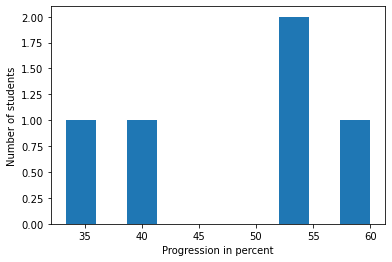

40.0
60.0
33.33333333333333
53.333333333333336
53.333333333333336
Navn: Hans  image: Image_url  average grade: 7.333333333333333
Navn: Kasper  image: Image_url  average grade: 2.0
Navn: Christoffer  image: Image_url  average grade: 2.6666666666666665
Navn: Hans  image: Image_url  average grade: 4.666666666666667
Navn: Alex  image: Image_url  average grade: 0.3333333333333333


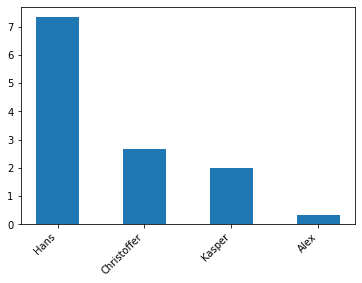

input to csv Hans,Male,Image_url,3,Math,kurt,1,20,12,Gym,Lise,3,20,0,Computer Science,Tess,1,20,10

input to csv Kasper,Male,Image_url,3,Math,Tess,9,30,-3,Computer Science,Nicolaj,6,40,7,English,Arne,2,20,2

input to csv Christoffer,Male,Image_url,3,physics,Arne,9,20,4,Danglish,Arne,9,20,4,physics,Arne,8,10,0

input to csv Hans,Male,Image_url,3,Gym,Lise,3,20,0,Math,Tess,5,20,12,Math,Arne,2,40,2

input to csv Alex,Male,Image_url,3,Chemestry,Tess,8,20,0,Computer Science,Arne,2,30,4,Math,Nicolaj,3,30,-3

from csv Hans,Male,Image_url,3,Math,1,kurt,20,12,Gym,3,Lise,20,0,Computer Science,1,Tess,20,10

from csv Kasper,Male,Image_url,3,Math,9,Tess,30,-3,Computer Science,6,Nicolaj,40,7,English,2,Arne,20,2

from csv Christoffer,Male,Image_url,3,physics,9,Arne,20,4,Danglish,9,Arne,20,4,physics,8,Arne,10,0

from csv Hans,Male,Image_url,3,Gym,3,Lise,20,0,Math,5,Tess,20,12,Math,2,Arne,40,2

from csv Alex,Male,Image_url,3,Chemestry,8,Tess,20,0,Computer Science,2,Arne,30,4,Math,3,Nicolaj,30,-3



In [18]:


student_lis = generate_student(5)
etcs_plot(student_lis)

csv_student_list = retrive_students_from_csv("files/outputWeek3.csv")


for student_ects in student_lis:
    student_ects.progression_in_percent()
print_name_avg(csv_student_list)

var_plot(sort_by_avg_grade(csv_student_list))

for student in student_lis:
    print("input to csv", student.__str__())
for student in csv_student_list:
    print("from csv", student)